In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

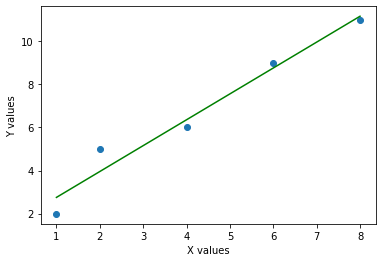

In [2]:
def StepGradient(dataset, slope, intercept):
    interceptGradient = 0
    slopeGradient = 0
    for i in range(0, len(dataset)):
        x = dataset.iloc[i, 0]
        y = dataset.iloc[i, 1]
        #Derivative of intercept
        interceptGradient += (-2) * (y - ((slope * x) + intercept))
        #Derivative of intercept
        slopeGradient += (-2) * x * (y - ((slope * x) + intercept))
    return [interceptGradient,slopeGradient]

def GradientDescent(dataset):
    step_size = 0.03
    intercept = 0
    slope = 0
    threshold = 0.1
    iterations = 0
    intercept_gradient = 0
    slope_gradient = 0
    # Calculating the gradient with initial values of slope and gradient
    [intercept_gradient,slope_gradient] = StepGradient(dataset, slope, intercept)
  
    
    # Checking for convergence
    while abs(intercept_gradient) > 0.01 or abs(slope_gradient) > 0.01: 
        # Updating the slope & intercept based on the gradient
        new_intercept = intercept - (step_size * intercept_gradient)
        new_slope = slope - (step_size * slope_gradient)
        slope = new_slope
        intercept = new_intercept
        intercept_gradient = 0
        slope_gradient = 0
        [intercept_gradient,slope_gradient] = StepGradient(dataset, new_slope, new_intercept)    
        iterations += 1
        step_size = 0.03 / ((iterations) ** (1./2.)) #Minimising the step_size after every iteration
    return [intercept, slope, iterations]
    

data = pd.DataFrame({'x': [1,2,4,6,8] ,'y': [2,5,6,9,11]})
(intercept_a,slope_b,iterations) = GradientDescent(data)

plt.scatter(data.x,data.y)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.plot(data.x, [slope_b*i + intercept_a for i in data.x],'green')
plt.show()



In [3]:
print('1) The values of slope = {0} and intercept ={1}'.format(round(slope_b,3),round(intercept_a,3)))
print('2) Number of iteration =', iterations)
print('3) I have started with a step_size of 0.03 and updated the value after every iteration by dividing it with the squareroot of the number of iterations.')
print('4) Since the value of step_size is updated after every iteration, it took only few seconds to train the model')

1) The values of slope = 1.202 and intercept =1.551
2) Number of iteration = 1373
3) I have started with a step_size of 0.03 and updated the value after every iteration by dividing it with the squareroot of the number of iterations.
4) Since the value of step_size is updated after every iteration, it took only few seconds to train the model
